In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
Cat_sales=pd.read_csv('C:/Users/Sampoorna/Desktop/clustering_data/BB_customer_segmentation.csv',sep=",")
Cat_sales.head()

,customer,grocery_spends_3m,no_of_trips,electronics_spend_3m,meat_frozen_spend,apparels_spend,no_of_stores_visited,preferred_time,perc_weekend,over_the_counter
0,2710,1446,34,9339,2664,0,4,19,98,735
1,3297,1614,34,9307,1955,0,4,17,98,552
2,1836,1275,34,9012,79,0,3,13,93,909
3,1974,1988,34,8874,2291,0,2,19,86,501
4,4647,1504,34,8869,3,0,4,18,82,457


In [3]:
cluser_data=Cat_sales.iloc[:,1:]
cluser_data.columns

Index(['grocery_spends_3m', 'no_of_trips', 'electronics_spend_3m',
       'meat_frozen_spend', 'apparels_spend', 'no_of_stores_visited',
       'preferred_time', 'perc_weekend', 'over_the_counter'],
      dtype='object')

In [4]:
##scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluser_data)

In [5]:
##converting scaled data into an array

cluster_data1=pd.DataFrame(scaled_data,columns=['grocery_spends_3m', 'no_of_trips', 'electronics_spend_3m',
       'meat_frozen_spend', 'apparels_spend', 'no_of_stores_visited',
       'preferred_time', 'perc_weekend', 'over_the_counter'])

In [6]:
cluster_data1.head()

,grocery_spends_3m,no_of_trips,electronics_spend_3m,meat_frozen_spend,apparels_spend,no_of_stores_visited,preferred_time,perc_weekend,over_the_counter
0,0.784355,1.483963,3.432481,1.322683,-0.762456,1.624163,1.025083,1.004131,1.054430
1,1.076659,1.483963,3.417911,0.509963,-0.762456,1.624163,0.327463,1.004131,0.522177
2,0.486831,1.483963,3.283592,-1.640480,-0.762456,0.638986,-1.067778,0.832473,1.560507
3,1.727384,1.483963,3.220758,0.895117,-0.762456,-0.346191,1.025083,0.592151,0.373845
4,0.885270,1.483963,3.218482,-1.727598,-0.762456,1.624163,0.676273,0.454825,0.245871


In [10]:
##training the model
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(cluster_data1)
print(y_kmeans5)

kmeans5.cluster_centers_

[3 3 3 ... 2 0 0]


array([[-8.74580299e-01, -9.27606880e-01,  2.63072415e-01,
        -1.75799441e-03, -4.62889659e-01, -7.68651466e-01,
         8.42900177e-01, -8.65734305e-01, -9.17328543e-01],
       [ 7.48097510e-01,  7.98300116e-01, -7.82127367e-01,
         8.84613155e-01,  7.63410249e-01,  6.49316668e-01,
         1.77165345e-01,  7.20150328e-01,  7.24448757e-01],
       [-8.54859608e-01, -9.28989723e-01,  2.74728070e-01,
         1.52535696e-02, -4.91140154e-01, -7.68785033e-01,
        -1.20067231e+00, -8.47885334e-01, -9.11199863e-01],
       [ 6.20022997e-01,  6.65503544e-01,  1.84930771e+00,
         7.84910470e-02, -7.62456434e-01,  6.77144197e-01,
         1.19282251e-01,  7.42714795e-01,  8.65481024e-01],
       [ 7.74890190e-01,  8.36122104e-01, -7.75473337e-01,
        -9.05286721e-01,  6.64538092e-01,  6.38082922e-01,
         1.05899773e-01,  7.21233169e-01,  7.73672007e-01]])

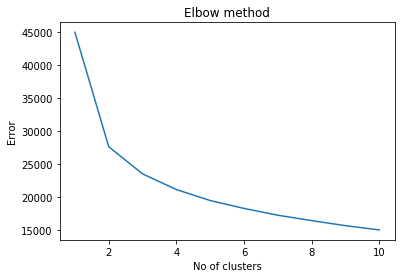

In [8]:
##elbow curve to identify number of clusters
Error=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(cluster_data1)
    kmeans.fit(cluster_data1)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

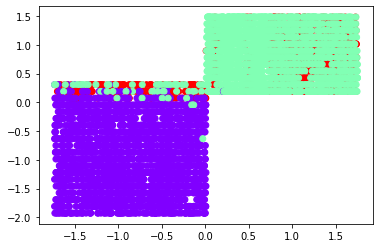

In [9]:
plt.scatter(cluster_data1.iloc[:,0],cluster_data1.iloc[:,1], c=y_kmeans5,cmap='rainbow')

In [12]:
profiling_data=Cat_sales.copy()

profiling_data.head()

,customer,grocery_spends_3m,no_of_trips,electronics_spend_3m,meat_frozen_spend,apparels_spend,no_of_stores_visited,preferred_time,perc_weekend,over_the_counter
0,2710,1446,34,9339,2664,0,4,19,98,735
1,3297,1614,34,9307,1955,0,4,17,98,552
2,1836,1275,34,9012,79,0,3,13,93,909
3,1974,1988,34,8874,2291,0,2,19,86,501
4,4647,1504,34,8869,3,0,4,18,82,457


In [18]:
x=pd.DataFrame(y_kmeans5,columns=['cluster_no'])

In [19]:
profiling_data2=pd.concat([profiling_data,x],axis=1)

In [26]:
##Finding mean based n cluster for every attribute

avg_data=profiling_data2.groupby('cluster_no')['grocery_spends_3m', 'no_of_trips', 'electronics_spend_3m',
       'meat_frozen_spend', 'apparels_spend', 'no_of_stores_visited',
       'preferred_time', 'perc_weekend', 'over_the_counter'].mean().reset_index()

avg_data

,cluster_no,grocery_spends_3m,no_of_trips,electronics_spend_3m,meat_frozen_spend,apparels_spend,no_of_stores_visited,preferred_time,perc_weekend,over_the_counter
0,0,492.536878,13.493997,2378.134648,1508.585763,436.632933,1.571184,18.477702,43.535163,57.066895
1,1,1424.937918,28.172875,82.755492,2283.257880,2227.522445,3.009551,16.565425,89.730659,621.224451
2,2,503.871226,13.482238,2403.733570,1523.426288,395.456483,1.571048,12.619005,44.055062,59.174067
3,3,1351.551056,27.040493,5861.929577,1578.593310,0.000000,3.038732,16.403169,90.385563,670.035211
4,4,1440.745654,28.487649,97.033852,721.862763,2076.825252,3.000000,16.368710,89.757548,638.745654


In [27]:
##pivoting the table using melt

profiling_data5=avg_data.melt(id_vars=["cluster_no"],
                                value_name="value").fillna(0)

profiling_data5.head()

,cluster_no,variable,value
0,0,grocery_spends_3m,492.536878
1,1,grocery_spends_3m,1424.937918
2,2,grocery_spends_3m,503.871226
3,3,grocery_spends_3m,1351.551056
4,4,grocery_spends_3m,1440.745654


In [28]:
profiling_data5.sort_values('cluster_no')

,cluster_no,variable,value
0,0,grocery_spends_3m,492.536878
25,0,no_of_stores_visited,1.571184
15,0,meat_frozen_spend,1508.585763
30,0,preferred_time,18.477702
20,0,apparels_spend,436.632933
35,0,perc_weekend,43.535163
10,0,electronics_spend_3m,2378.134648
5,0,no_of_trips,13.493997
40,0,over_the_counter,57.066895
36,1,perc_weekend,89.730659


In [46]:
##Calculating the mean across the cluster
'mean_val'=profiling_data5.groupby('variable').mean()

ValueError: Wrong number of items passed 2, placement implies 1

In [44]:
profiling_data5.drop(columns=['index'],inplace=True)

KeyError: "['index'] not found in axis"

In [35]:
profiling_data5.reset_index()

,index,cluster_no,variable,value,mean_val
0,0,0,grocery_spends_3m,492.536878,NaN
1,1,1,grocery_spends_3m,1424.937918,NaN
2,2,2,grocery_spends_3m,503.871226,NaN
3,3,3,grocery_spends_3m,1351.551056,NaN
4,4,4,grocery_spends_3m,1440.745654,NaN
5,5,0,no_of_trips,13.493997,NaN
6,6,1,no_of_trips,28.172875,NaN
7,7,2,no_of_trips,13.482238,NaN
8,8,3,no_of_trips,27.040493,NaN
9,9,4,no_of_trips,28.487649,NaN


In [ ]:
profiling_data5.drop()

In [45]:
profiling_data5.head()

,cluster_no,variable,value
0,0,grocery_spends_3m,492.536878
1,1,grocery_spends_3m,1424.937918
2,2,grocery_spends_3m,503.871226
3,3,grocery_spends_3m,1351.551056
4,4,grocery_spends_3m,1440.745654
